In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

In [48]:
img = cv2.imread('bulls.jpg')
new_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #rgb2ycbcr(img)


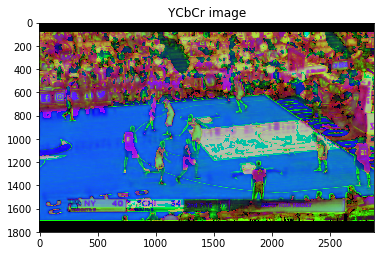

(<matplotlib.image.AxesImage at 0x121fbd160>, Text(0.5,1,'YCbCr image'), None)

In [49]:
plt.imshow(new_img), plt.title('YCbCr image'), plt.show()

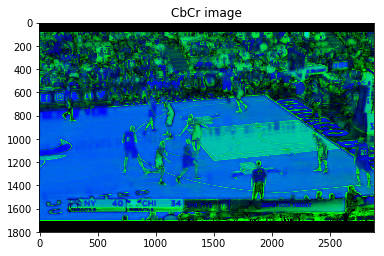

(1800, 2880, 3)

In [50]:
CrCb = new_img.copy()
CrCb[:,:,0] = 0
plt.imshow(CrCb), plt.title('CbCr image'), plt.show()
CrCb.shape

In [51]:
'''bins = np.zeros(256, np.int32)

for i in range(0, CrCb.shape[0]):
    for j in range(0, CrCb.shape[1]):

        intensity = 0
        for k in range(0, len(CrCb[i][j])):
            intensity += CrCb[i][j][k]

        bins[intensity/3] += 1

print(bins)'''

hist,edges = np.histogram(new_img, bins=256)
print(hist)
#print(bins)
print(CrCb[1][1])


[1756331   47195   54937   59494   59798   69254   62317   54639   75488
   75850   79722   79985   76726   91280  111452  178909  338735  450558
  284776  302423  229948  104883   57591   67135   54107   51264   57708
   52381   53932   48369   75187   48321   51523   50790   50971   50138
   56239   40476   51730   48534   52393   46267   44703   54931   46411
   55901   53213   45469   47362   46540   51590   58996   43005   52815
   45665   50414   42771   53352   44378   44407   69155   42197   42023
   36064   59801   39934   39672   41417   47422   37209   50371   40645
   38874   47777   39421   56059   37099   47412   47134   38240   54263
   44313   41612   47719   41628   73886   43416   47406   50839   51915
   89387   63210   63748   71074   77705   80342   89564   82328   97474
  101196  117497   98204  113465   75516   73868   88856   70338   71439
   73412   76758   76209   79597   69935   93682   71226   71372   68893
   63016   62897   46425  108783   42944   42138   

In [52]:
CrCb.ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [53]:
max(hist)

1756331

In [54]:
CrCb.shape

(1800, 2880, 3)

In [55]:
bins.shape

(128,)

In [56]:
import operator
index, value = max(enumerate(hist), key=operator.itemgetter(1))

In [57]:
print(index)
print(value)

0
1756331


In [62]:
getbin = 127
for d in new_img:
    val = np.searchsorted(edges, d, side='right')-1
    if val == getbin or val == len(edges)-1:
        print ('found:', d)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()